In [1]:
from IPython.display import Image 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# What have we learned?

## Python 
    - Data types: Int/Float/String/Boolean
    - Data structures: List/Dictionary/Arrays/Dataframe
    - Code:
        - Functions (mean(), read_csv())
        - Control: 
            - If/Else statements
            - For loops

## Pandas
    - Read files (read_csv/read_stata...)
    - Filter by condition (df.loc[df["column1"]==3,["column1","column2"]])
    - Tidy data (melt/pivot_table)
        - Each column is a variable
        - Each row is an observation
    - Combine data
        - Merge: A common column, combine horizontally
        - Concat: Same variables, extra info, combine vertically
    - Groupby    
    - Math operations, str methods...
    
   
## Visualization
    - seaborn and pylab
    - Channels of information:
        - Use position (e.g. lenght) for the most important variables
        - Use colors if you run out of positions
    - How to plot:
        - Catplot: 1 numerical variable
        - Relplot: 2 numerical variables
        - Lmplot: Regression
    
##  Maps
    - Geocoding addresses
    - Fuzzy merge
    - Intersections
    - Plotting maps (and interactive map)
    
## Missing values
    - Drop (df.dropna(subset=["column3"])
    - Impute: 
        - Mean/Median (df.fillna(df.mean()))
        - Using neighboors (df.interpolate() or fancyimpute). 
        
## Time series
    - Resample to fix uneven spaced data
    - Interpolate to impute missing data
    - Shift to create lagged variables
    
## Linear (additive) models
    - p-value: Probability of getting a more extreme value assuming that the null hypothesis is true.
    - Biases: Know your biases and avoid them!
    - Bootstrapping: Get confidence intervals
    - The type of distribution tells you a lot about the data
    - Linear regression
        - Normality and how to transform variables with skewed distributions
        - Residuals and outliers
    - Mixed models (Random effects)
    - Panel model (Within regression (fixed effects))
    
## Dimensionality reduction 
    - Factor analysis
    
    

---
---
---
---

## Important: About the server
- It will stop working in ~1 month
- You can run everything in your computer (let's set up Python in your computer) 
- Start downloading: https://www.anaconda.com/distribution/

---
---
---
---

# PART 1: Last bit of programming for the course: Machine learning
Amazing documentation: https://scikit-learn.org/stable/

###  Types
- **Supervised machine learning**:
    - Training data with an input and an output
    - Main examples:
        - Classification
        - Regression
- **Unsupervised machine learning**:
    - You give only input
    - Main examples:
        - Clustering
        - Dimensionality reduction
        - Novelty or outlier detection
- **Semi-supervised machine learning**:
    - Training data with an input and an output
    - Then you use the model for a dataset where you only have input
    - Main example:
        - Classification


### Some differences with inferential statistics
- Focused on _prediction_, not on _understanding_ 
- Usually in the context of big data
- Have a "regularization" parameter to avoid overfitting

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("./data/big3_position.csv",sep="\t")
df[["Revenue","Assets","Employees","MarketCap"]] = np.log10(df[["Revenue","Assets","Employees","MarketCap"]])
df = df.replace(-np.inf,np.nan).dropna()
df.loc[df["Position"]>3,"Position"] = 4
df.head(2)

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


,Company_name,Company_ID,Big3Share,Position,Revenue,Assets,Employees,MarketCap,Exchange,TypeEnt
23,"PROTEOSTASIS THERAPEUTICS, INC.",US000980301,0.00,4,3.634679,4.271609,1.633468,5.483054,NASDAQ National Market,Industrial company
24,"TELIGENT, INC.",US010355758,9.75,3,4.645913,5.266613,2.029384,5.488190,NASDAQ National Market,Industrial company


## 1. Preprocessing (not machine learning) with StandardScaler
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [4]:
#Scale variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df[["Revenue","Assets","Employees","MarketCap"]]

var_scaled = scaler.fit_transform(X)
df["Revenue_scaled"] = var_scaled[:,0]
df["Assets_scaled"] = var_scaled[:,1]
df["Employees_scaled"] = var_scaled[:,2]
df["MarketCap_scaled"] = var_scaled[:,3]

print(df["Revenue_scaled"].describe())
df.head()

/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


count    3.013000e+03
mean     9.022911e-16
std      1.000166e+00
min     -5.340804e+00
25%     -5.841901e-01
50%      7.487483e-02
75%      6.660190e-01
max      2.961059e+00
Name: Revenue_scaled, dtype: float64


,Company_name,Company_ID,Big3Share,Position,Revenue,Assets,Employees,MarketCap,Exchange,TypeEnt,Revenue_scaled,Assets_scaled,Employees_scaled,MarketCap_scaled
23,"PROTEOSTASIS THERAPEUTICS, INC.",US000980301,0.00,4,3.634679,4.271609,1.633468,5.483054,NASDAQ National Market,Industrial company,-2.039080,-2.022561,-1.656157,-0.527069
24,"TELIGENT, INC.",US010355758,9.75,3,4.645913,5.266613,2.029384,5.488190,NASDAQ National Market,Industrial company,-1.037530,-0.885636,-1.229665,-0.521271
26,BAR HARBOR BANKSHARES,US010393663,7.22,1,4.731291,6.198672,2.344392,5.308093,NYSE MKT,Bank,-0.952970,0.179367,-0.890328,-0.724555
27,IDEXX LABORATORIES INC,US010393723,17.10,1,6.204633,6.168790,3.832509,6.906554,NASDAQ National Market,Industrial company,0.506263,0.145222,0.712717,1.079701
28,"FIRST BANCORP, INC (THE)",US010404322,9.56,1,4.725601,6.193030,2.338456,5.334586,NASDAQ National Market,Bank,-0.958605,0.172920,-0.896722,-0.694650


## 2. Classification with SVM
https://scikit-learn.org/stable/modules/svm.html#svm-classification

In [5]:
from sklearn import svm
X = df[["Revenue_scaled","Assets_scaled","Employees_scaled","MarketCap_scaled"]].values
y = df["Position"].values

#Train the model
clf = svm.LinearSVC(C=1E6,random_state=0)
clf.fit(X, y)  


#Use the model to predict other data (using the same one, you should use a different dataset or cross-validation)
X = df[["Revenue_scaled","Assets_scaled","Employees_scaled","MarketCap_scaled"]].values
new_y = clf.predict(X)
df["Position_predicted"] = new_y


#Simple measure on how well we're doing
print((df["Position"] == df["Position_predicted"]).sum(),(df["Position"] != df["Position_predicted"]).sum())
print((df["Position"] == 4).sum()) #Now change the C parameter (regularization)

#But there are many other measures of error
#https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics

#The same measure but from sklearn
from sklearn.metrics import accuracy_score 
print(accuracy_score (df["Position"],new_y))

#See what we did
df.loc[:,["Position","Position_predicted"]].head()

/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


965 2048
1007
0.32027879190175906


,Position,Position_predicted
23,4,1
24,3,1
26,1,3
27,1,1
28,1,3


## 3. Lasso regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [6]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
X = df[["Revenue_scaled","Assets_scaled","Employees_scaled"]].values
y = df["MarketCap_scaled"].values

clf.fit(X,y)
print(clf.coef_)
print(clf.intercept_)  


#Use the model to predict other data (using the same one, you should use a different dataset or cross-validation)
X = df[["Revenue_scaled","Assets_scaled","Employees_scaled"]].values
new_y = clf.predict(X)

from sklearn.metrics import r2_score
r2_score(df["MarketCap_scaled"],new_y)

[0.17705389 0.56619114 0.04077878]
-5.674143804859193e-16


0.716610636598024

## 3. Clustering with K-means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [7]:
from sklearn.cluster import KMeans
X = df[["Revenue_scaled","Assets_scaled","Employees_scaled","MarketCap_scaled"]].values

#Asking to find two clusters of companies
kmeans = KMeans(n_clusters=2)
df["cluster"] = kmeans.fit_predict(X)

print(kmeans.cluster_centers_)

[[ 0.72238175  0.70974002  0.70937984  0.71514752]
 [-0.75024086 -0.73711159 -0.73673752 -0.74272764]]


/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


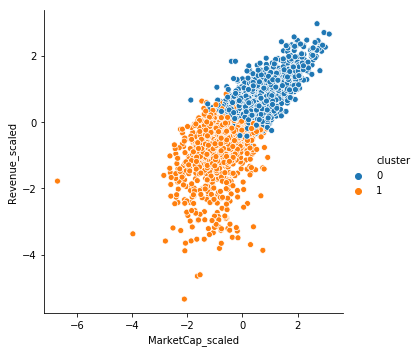

In [8]:
import seaborn as sns
%matplotlib inline
sns.relplot(x="MarketCap_scaled",y="Revenue_scaled",hue="cluster",data=df,kind="scatter")

## 4. Dimensionality reduction with PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [9]:
from sklearn.decomposition import PCA
X = df[["Revenue_scaled","Assets_scaled","Employees_scaled","MarketCap_scaled"]].values


pca = PCA(n_components=2)
pca_results = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
df["pca_1"] = pca_results[:,0]
df["pca_2"] = pca_results[:,1]
df.head()

[0.83221993 0.09773067]


,Company_name,Company_ID,Big3Share,Position,Revenue,Assets,Employees,MarketCap,Exchange,TypeEnt,Revenue_scaled,Assets_scaled,Employees_scaled,MarketCap_scaled,Position_predicted,cluster,pca_1,pca_2
23,"PROTEOSTASIS THERAPEUTICS, INC.",US000980301,0.00,4,3.634679,4.271609,1.633468,5.483054,NASDAQ National Market,Industrial company,-2.039080,-2.022561,-1.656157,-0.527069,1,1,3.135060,-0.541539
24,"TELIGENT, INC.",US010355758,9.75,3,4.645913,5.266613,2.029384,5.488190,NASDAQ National Market,Industrial company,-1.037530,-0.885636,-1.229665,-0.521271,1,1,1.836512,-0.466905
26,BAR HARBOR BANKSHARES,US010393663,7.22,1,4.731291,6.198672,2.344392,5.308093,NYSE MKT,Bank,-0.952970,0.179367,-0.890328,-0.724555,3,1,1.193865,-0.583748
27,IDEXX LABORATORIES INC,US010393723,17.10,1,6.204633,6.168790,3.832509,6.906554,NASDAQ National Market,Industrial company,0.506263,0.145222,0.712717,1.079701,1,0,-1.215016,0.003945
28,"FIRST BANCORP, INC (THE)",US010404322,9.56,1,4.725601,6.193030,2.338456,5.334586,NASDAQ National Market,Bank,-0.958605,0.172920,-0.896722,-0.694650,3,1,1.188337,-0.602293


Text(0, 0.5, 'employees')

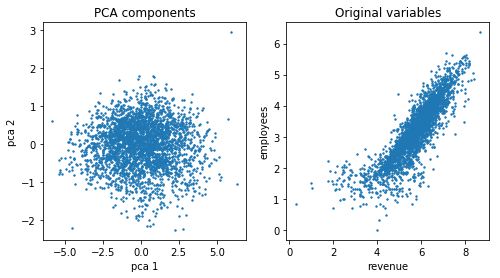

In [10]:
import pylab as plt
plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
plt.scatter(df["pca_1"],df["pca_2"],s=2)
plt.title("PCA components")
plt.xlabel("pca 1")
plt.ylabel("pca 2")
ax2 = plt.subplot(1,2,2)
plt.scatter(df["Revenue"],df["Employees"],s=2)
plt.title("Original variables")
plt.xlabel("revenue")
plt.ylabel("employees")

## 5. Novelty and Outlier detection using Isolation Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest


/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


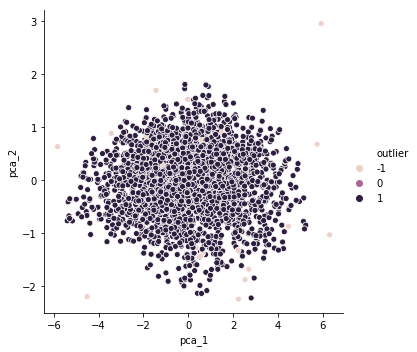

In [11]:
from sklearn.neighbors import LocalOutlierFactor

X = df[["Revenue_scaled","Assets_scaled","Employees_scaled","MarketCap_scaled"]].values
y = df["Position"].values

# fit the model
lof = LocalOutlierFactor(contamination=0.01)
df["outlier"] = lof.fit_predict(X)

sns.relplot(x="pca_1",y="pca_2",hue="outlier",data=df)

---
---
---
---

# PART 2: A whole new world: Non-linear models

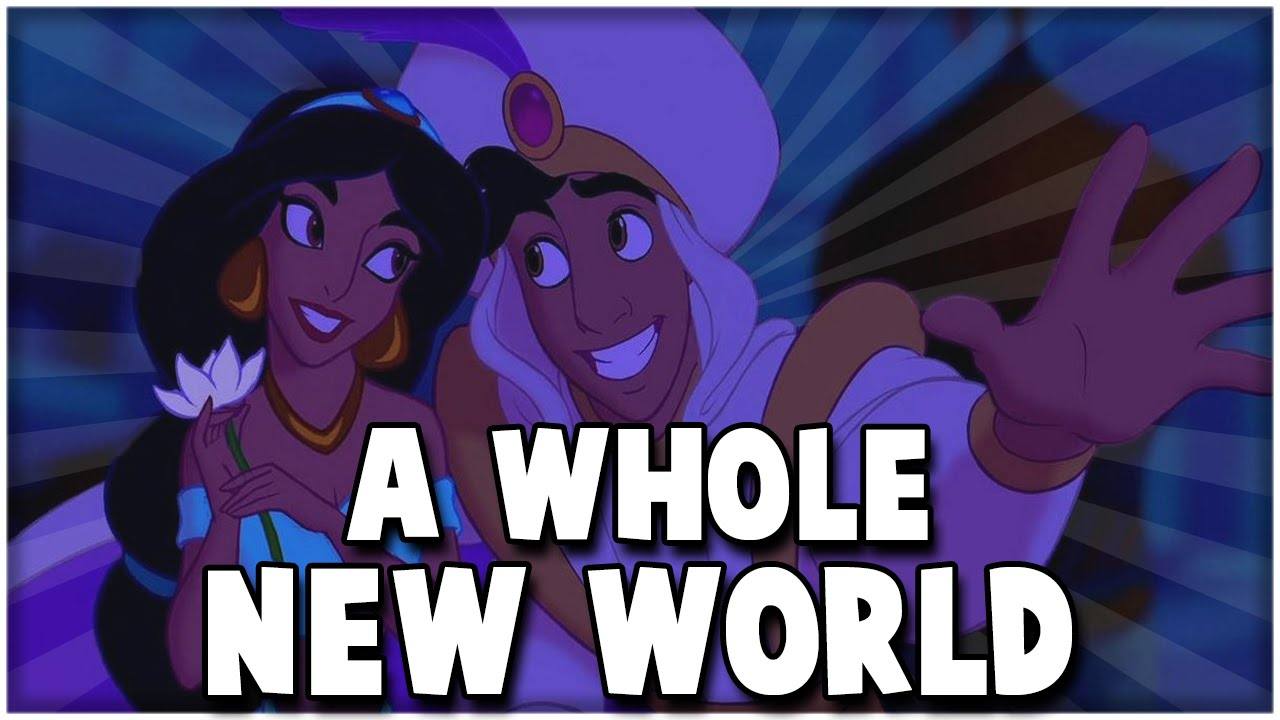

In [12]:
Image("https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fi.ytimg.com%2Fvi%2FPajXSxYm8p0%2Fmaxresdefault.jpg",width=800)

## How to make sense of reality?
- Theory
    
- Linear models
    - Great to find some trends
    - Non-linearity can be added using interaction terms and variables**2.
    - They cannot account for some phenomena, and find relationships between variables
    - Easily interpretable
   

Linear models...


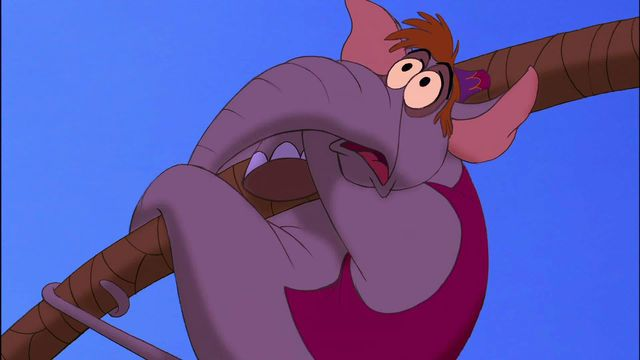

In [13]:
print("Linear models...")
Image("https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fs-media-cache-ak0.pinimg.com%2F736x%2F05%2Fc2%2F65%2F05c2659bc2ecebbbd92948e95ecb0065.jpg")

## ~~Some~~ Many situations cannot be explained by linear models. 
- Stock market crashes
- Collapse of civilizations 
- Innovation 
- Revolutions
- Cooperation
- Spread of beliefs and opinions

**They are all complex systems**:
- From roughly 1700 to 2000, we enjoyed the Golden Age of Reductionism, where we discovered the fundamental components of systems across many scales: atoms, sub-atomic particles, and DNA. Atoms weren't universally accepted until 1908.  (http://www.uvm.edu/pdodds/writings/2015-06-04complex-systems-manifesto/)
- Now we can't go back to where we used to be. We see that reductionism cannot answer many of the questions we're interested in, but a complex systems approach can --> https://www.ted.com/talks/nicolas_perony_puppies_now_that_i_ve_got_your_attention_complexity_theory

Main idea:
- **Interactions** of many simple agents create the non-linear and non-additive behavior
- **Micro-macro problem** 
  - In sociology: Coleman's bathtub --> Capitalism as a result of protestant values.
  
  
**Great paper: Watts, D. J. The Collective Dynamics of Belief.** (upload)

# Complex systems: A new fantastic point of view
Interaction of many individuals following simple rules produce complex behaviors.
`More is different`

1. Multi-scale: The whole is composed of many individual parts interacting --> Fractal structures
2. Networks: The individuals usually interact with a few other individuals, creating a network of interactions. For social systems, the networks created are "small-world" networks, where the distance between two random people in a network is small. --> 6 degrees
3. Emergent properties: The whole has properties that none of the individuals have. 
4. Spontaneous order. There is not a global organizer of the system. The standing ovation is an emergent property of the interaction between people. 
5. Memory: The individuals remember previous interactions. 
6. Feedback loops: Your decision affect the decision of others. For instance your decision about standing up affects the probability that other people start standing up.  
7. Stochasticity: The system lives in a noise environment. 
8. Steady-states far from equilibrium. If no energy is added to the system the whole disappears.  
9. Non-linearity, cascading and hysteresis. The interactions are non additive. For the rioting example, the addition of a new rioting people can bring a cascade of events.
10. Robustness to random failures. The system is highly resistant to the failure of one of the individuals. 
11. Sensitivity to targeted failures if individuals are organized in network: The system is sensitive to the failure/removal of a few specific individuals. 

Intro video: https://www.youtube.com/watch?v=16W7c0mb-rE

## How to make sense of non-linear reality?
### Data exploration
- (hining, shimmering, splendid) Visualization
- Machine learning 
        
### Formal non-linear models (Dogs are non-elephant animals)
- Take you wonder by wonder:
    - Granovetter model on collective behavior
    - Schelling model on segregation

- Topology
    - Mixed system
    - Grid
    - Networks: Topology is important!! Awesome game: https://ncase.me/crowds/
- Rules:
    - Differential equations:
        - http://139.59.0.85/wp-content/uploads/2014/09/rabbits_and_foxes.png
    - Threshold models:
        - Schelling/Granovetter/Axerlrod
    - Game theory
        - Prisoner dilemma / Cooperation
        - Awesome game: https://ncase.me/trust/
    - Agent based modeling:
        - Flock of birds
    - Generative mechanisms:
        - Rich get richer
            - E.g. musiclab: "Experimental study of inequality and unpredictability in an artificial cultural market."
            - Inequality
        - Consensus
        ...
- Evolution
     - Repeated contacts change everything
        
        
- Formal models are important because we can learn from them (a dazzling place we never knew):
    - Basic science (fun, origin of life)
    - Exploit them (fix the planet)
    - Copy from them (AI, power grid, antenna...)
    
    
- Follow this course: https://www.coursera.org/learn/model-thinking

You've got some power in your corner now!
Now on to new horizons to pursue
TIME TO FILL THE EVALUATION FORM!


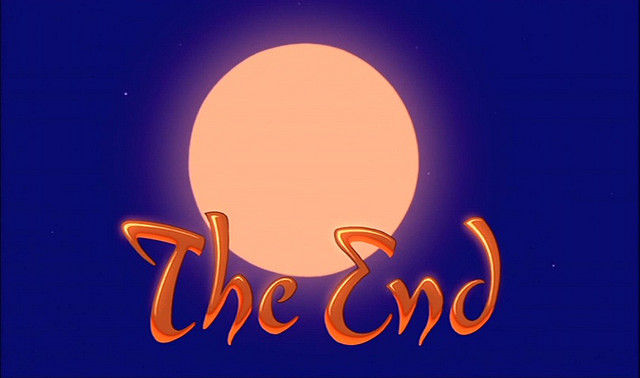

In [14]:
print("You've got some power in your corner now!")
print("Now on to new horizons to pursue")

print("Time to fill the evaluation form!".upper())

Image("http://3.bp.blogspot.com/_Ep-Z85YdmMg/TD8w0l8zn5I/AAAAAAAAHt4/Js-EUoqAh38/s1600/01.jpg")